#### Importowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt

sns.set_style("darkgrid")

#### Wczytanie zbioru danych

In [2]:
df = pd.read_excel("../Tabela 1.xlsx")

In [3]:
df.head()

,Name,Exposure,class,Chemical,SEX (M/F),Gen1,Gen2,Gen3,Gen4,Gen5,...,Gen2971,Gen2972,Gen2973,Gen2974,Gen2975,Gen2976,Gen2977,Gen2978,Gen2979,Gen2980
0,Sample1,Control,C(M),Control,M,1.126636,0.982482,0.965753,0.795236,1.093474,...,1.943480,2.059138,0.560137,1.073068,1.864937,0.949825,2.004953,1.894345,1.801144,2.116696
1,Sample2,Control,C(M),Control,M,1.102942,0.792857,0.842533,0.704507,0.803609,...,1.933369,1.939796,1.226766,1.118514,1.815777,0.846754,1.921322,1.782817,1.704406,2.068778
2,Sample3,Control,C(M),Control,M,1.129240,0.989232,0.974295,0.771200,0.970926,...,1.919848,2.077602,1.084620,1.089832,1.825995,1.043954,1.998114,1.845221,1.728693,2.097107
3,Sample4,Control,C(M),Control,M,1.100176,1.010291,0.802952,0.696876,0.617705,...,1.941300,2.034530,1.401092,1.067069,1.814479,0.860357,2.041024,1.772065,1.633040,2.052009
4,Sample5,Control,C(M),Control,M,1.052659,1.033912,0.697614,1.229266,0.642373,...,1.933198,1.920972,0.971900,1.132778,1.831693,0.872452,1.849572,1.798413,1.777406,1.989491


#### Analiza PCA

Variance explained:
PC1: 54.72%
PC2: 3.10%
PC3: 1.87%
Total variance explained (3 components): 59.69%


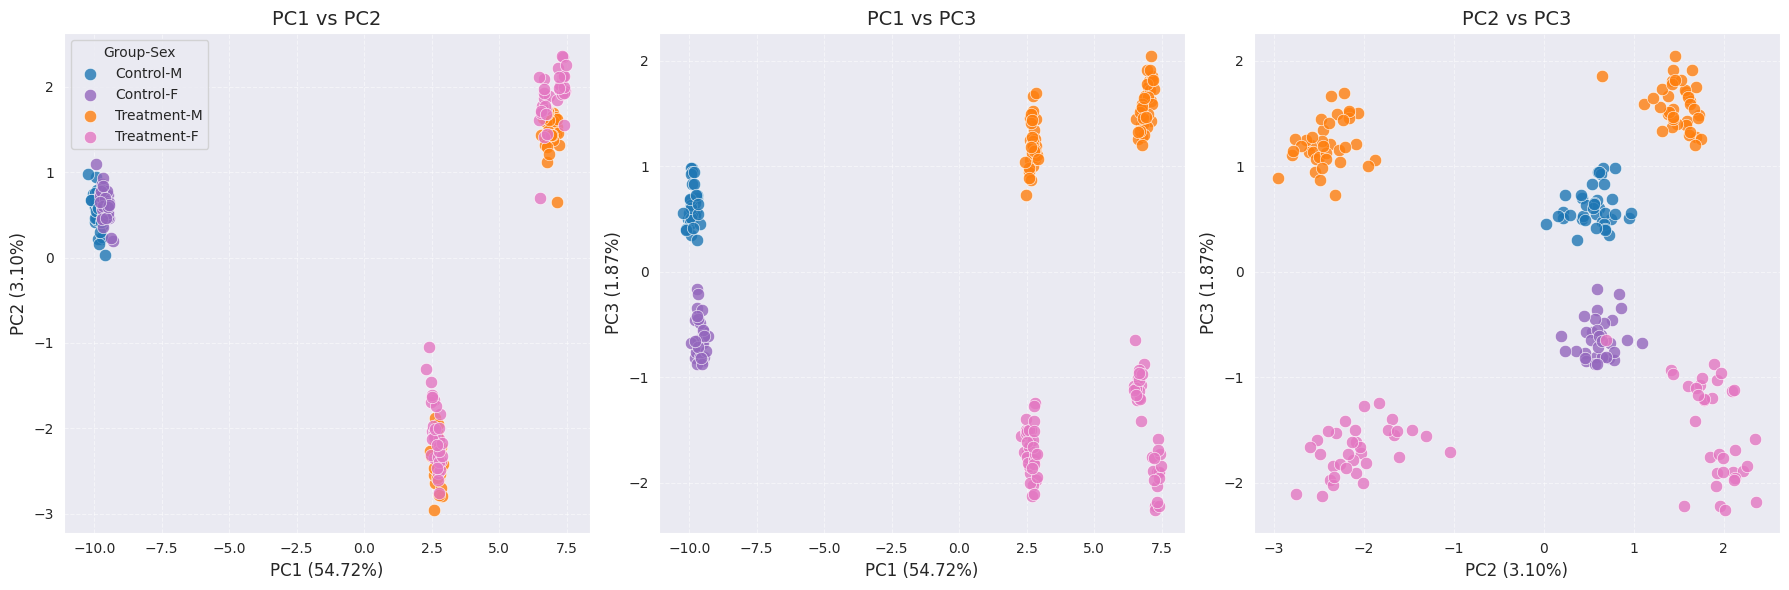

In [7]:
# Prepare data for PCA with gender information
# Identify control and non-control samples
df['is_control'] = df['Exposure'].str.contains('Control')

# Exclude non-numeric columns for PCA
X = df.drop(['Name', 'Exposure', "class", 'Chemical', 'SEX (M/F)', 'is_control'], axis=1)

# Apply PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(
    data=principal_components, 
    columns=[f'PC{i+1}' for i in range(3)]
)

# Add sample information
pca_df['Group'] = df['is_control'].map({True: 'Control', False: 'Treatment'})
pca_df['Sex'] = df['SEX (M/F)']
pca_df['Name'] = df['Name']

# Calculate variance explained
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.2%}")
print(f"Total variance explained (3 components): {sum(explained_variance):.2%}")

# # Create a figure for PCA visualization with sex differentiation
# plt.figure(figsize=(12, 10))

# Create a custom color palette for the four groups
colors = {'Control-M': '#1f77b4', 'Control-F': '#9467bd',
          'Treatment-M': '#ff7f0e', 'Treatment-F': '#e377c2'}

# Create a combination of group and sex for coloring
pca_df['Group_Sex'] = pca_df['Group'] + '-' + pca_df['Sex']

# # Create the scatter plot
# for group_sex, color in colors.items():
#     mask = pca_df['Group_Sex'] == group_sex
#     plt.scatter(
#         x=pca_df.loc[mask, 'PC1'],
#         y=pca_df.loc[mask, 'PC2'],
#         c=color,
#         s=100,
#         alpha=0.8,
#         label=group_sex,
#         edgecolors='w',
#         linewidths=0.5
#     )

# # Add labels and annotations
# plt.xlabel(f'PC1 ({explained_variance[0]:.2%})', fontsize=14)
# plt.ylabel(f'PC2 ({explained_variance[1]:.2%})', fontsize=14)
# plt.title('PCA Analysis: Sex and Treatment Differences', fontsize=18)
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.legend(title='Group-Sex', fontsize=12, title_fontsize=14)

# # Add a text box with variance information
# plt.annotate(
#     f"Total variance explained: {sum(explained_variance[:2]):.2%}",
#     xy=(0.02, 0.02),
#     xycoords='axes fraction',
#     fontsize=12,
#     bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8)
# )

# # Show sample names on hover (interactive plot)
# # Note: This only works in interactive environments like Jupyter
# for i, txt in enumerate(pca_df['Name']):
#     plt.annotate(
#         txt,
#         (pca_df.iloc[i]['PC1'], pca_df.iloc[i]['PC2']),
#         fontsize=8,
#         alpha=0,  # Make it invisible initially
#         xytext=(5, 5),
#         textcoords='offset points'
#     )

# plt.tight_layout()
# plt.show()

# Create a grid of pairwise PC plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PC1 vs PC2
for group_sex, color in colors.items():
    mask = pca_df['Group_Sex'] == group_sex
    axes[0].scatter(
        x=pca_df.loc[mask, 'PC1'],
        y=pca_df.loc[mask, 'PC2'],
        c=color,
        s=80,
        alpha=0.8,
        label=group_sex,
        edgecolors='w',
        linewidths=0.5
    )
axes[0].set_xlabel(f'PC1 ({explained_variance[0]:.2%})', fontsize=12)
axes[0].set_ylabel(f'PC2 ({explained_variance[1]:.2%})', fontsize=12)
axes[0].set_title('PC1 vs PC2', fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend(title='Group-Sex')

# PC1 vs PC3
for group_sex, color in colors.items():
    mask = pca_df['Group_Sex'] == group_sex
    axes[1].scatter(
        x=pca_df.loc[mask, 'PC1'],
        y=pca_df.loc[mask, 'PC3'],
        c=color,
        s=80,
        alpha=0.8,
        label=group_sex,
        edgecolors='w',
        linewidths=0.5
    )
axes[1].set_xlabel(f'PC1 ({explained_variance[0]:.2%})', fontsize=12)
axes[1].set_ylabel(f'PC3 ({explained_variance[2]:.2%})', fontsize=12)
axes[1].set_title('PC1 vs PC3', fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.5)

# PC2 vs PC3
for group_sex, color in colors.items():
    mask = pca_df['Group_Sex'] == group_sex
    axes[2].scatter(
        x=pca_df.loc[mask, 'PC2'],
        y=pca_df.loc[mask, 'PC3'],
        c=color,
        s=80,
        alpha=0.8,
        label=group_sex,
        edgecolors='w',
        linewidths=0.5
    )
axes[2].set_xlabel(f'PC2 ({explained_variance[1]:.2%})', fontsize=12)
axes[2].set_ylabel(f'PC3 ({explained_variance[2]:.2%})', fontsize=12)
axes[2].set_title('PC2 vs PC3', fontsize=14)
axes[2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### Wykres opisywanej wariancji przez 10 głównych składowych

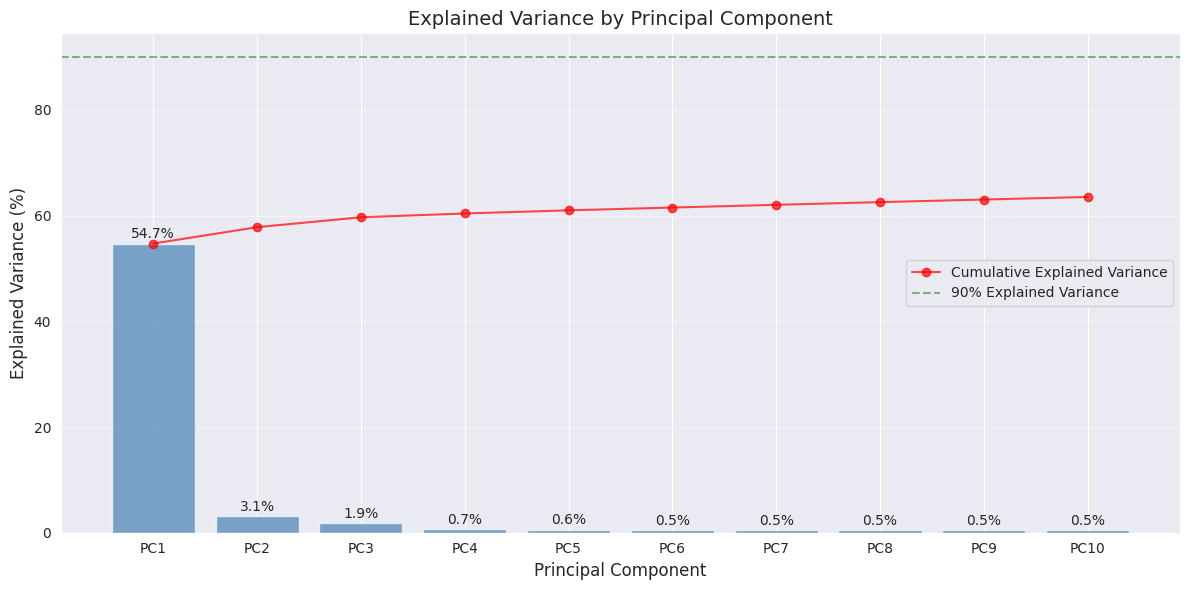

In [8]:
# Calculate variance explained for all components
pca = PCA()
pca.fit(X)
explained_variance_ratio = pca.explained_variance_ratio_

# Create explained variance plot
plt.figure(figsize=(12, 6))

# Bar plot of individual explained variance
plt.bar(range(1, 11), explained_variance_ratio[:10] * 100, alpha=0.7, color='steelblue')
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance (%)', fontsize=12)
plt.title('Explained Variance by Principal Component', fontsize=14)
plt.xticks(range(1, 11), [f'PC{i}' for i in range(1, 11)])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add cumulative explained variance line
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, 11), cumulative_variance[:10] * 100, 'ro-', alpha=0.7, label='Cumulative Explained Variance')

# Add percentage annotations on bars
for i, v in enumerate(explained_variance_ratio[:10]):
    plt.text(i+1, v*100 + 1, f"{v*100:.1f}%", ha='center', fontsize=10)

plt.axhline(y=90, color='green', linestyle='--', alpha=0.5, label='90% Explained Variance')
plt.legend()
plt.tight_layout()
plt.show()

Wyniki analizy PCA wskazują na to, że jest istotna różnica pomiędzy samcami i samicami z różnych grup. Wszystkie grupy tworzą osobne zgrupowania.